In [0]:
from matplotlib import pyplot as plt
import numpy as np
import random

###**Scenario 1**

### First Roomba Strategy 

In [0]:
class Roomba_sim():
    def __init__(self, size = 10):
        
        '''
     Inputs:
        
            size (int) The number of cells along each dimension of the
              2-dimensional grid. Default: 10.
        '''
        self.size= size
        self.steps = 0 
        #create an array of zeros
        self.current_state = np.zeros((self.size, self.size))      
        for i in range(self.size):
            for j in range(self.size):
                probability = random.random()
                
                if probability <0.1:
                    #randomly sets 10% of the room to be objects
                    self.current_state[i][j] = 5
                    
                
                elif probability < 0.3:
                    #randomly sets 20% of the room to be clean
                    self.current_state[i][j] = 0
                    
                else:
                #the other 70% are randomly set at a value from 1-4
                    self.current_state[i][j] = random.randint(1,4)       
        
    def initialize(self):
        #creates a wall around the perimeter, setting the value to 5 
        #so the roomba will not go through it 
        
        for x in [0,self.size-1]:
            for y in range(self.size):
                self.current_state[x,y] = 5
        
        for y in [0,self.size-1]:
            for x in range(self.size):
                self.current_state[x,y] = 5
        
        while True:
            #places the roomba randomly in the room 
            self.roomba_pos = (random.choice(range(1,self.size-1)),random.choice(range(1,self.size-1)))
            if self.current_state[self.roomba_pos] < 5:
                break 
        #the roomba cleans (subtracts one from the value of the cell) if it is identified to be dirty        
        if self.current_state[self.roomba_pos[0],self.roomba_pos[1]]>0: 
            self.current_state[self.roomba_pos[0],self.roomba_pos[1]] -=1 
        #movement is set to go one to the left 
        self.movement = np.array([-1,0])


    def check_hood(self):
        #function which changes neighborhood for possible places to go
        pos = self.roomba_pos 
        places = []
        #list of all the places that the roomba can go 
        
        for direction in [[0,1],[1,0],[0,-1],[-1,0]]:
            next_place = np.array(pos) + np.array(direction)
            
            if self.current_state[next_place[0],next_place[1]] < 5:
                places.append(next_place)
            #places all cells under 5 as possible places to go
        
        self.roomba_pos = random.choice(places)  
        #roomba randomly chooses one of the places to move & clean


    def step(self):
    
        self.check_hood()
        #first calls the check hood function to move to a non-object in neighborhood 

        if self.current_state[self.roomba_pos[0], self.roomba_pos[1]] > 0:
            self.current_state[self.roomba_pos[0], self.roomba_pos[1]] -= 1
        self.steps += 1
         #the state of the cell decreases by 1 as the roomba "cleans it"

    def check_dirt(self):
        
        dirty_cells = []
        #creates an empty array to store dirty cells
        for i in range(self.size):
            for j in range(self.size):
                if self.current_state[i][j] > 0 and self.current_state[i][j]<5:
                    dirty_cells.append(self.current_state[i][j])
        #loops through the array, storing all the dirty cells into the array 
        
        if len(dirty_cells) != 0:
            #if the array of dirty cells is not equal to zero
            room_size = self.size * self.size
            walls = (2*self.size)+(2*(self.size-2))
            objects = room_size*0.1
            #this equation finds the number of cells that could contain dirt 
            #and multiplies then by 4, the max amount of dirt to find the dirt potential
            dirt_potential = (room_size - walls - objects)*4
            average_dirt = sum(dirty_cells)/dirt_potential 
        else:
            average_dirt = 0            
        return(average_dirt)
   
    def draw(self):
        '''
        Draw  current state of the cellular automaton.
        '''
        
        plt.imshow(self.current_state,  cmap='YlOrBr')
        plt.title('Roomba Position: ' + str(self.roomba_pos))
        plt.show()

### Second Roomba Strategy 

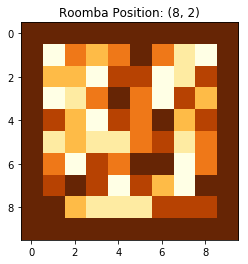

0.5601851851851852

In [0]:
class Roomba_sim2():
    # Create the attributes of the room class
    def __init__(self, size = 10):
        
        '''
     Inputs:
        
            size (int) The number of cells along each dimension of the
              2-dimensional grid. Default: 100.

        '''
        self.size=size
        self.steps = 0 
        
        self.current_state = np.zeros((self.size, self.size))      
        for i in range(self.size):
            for j in range(self.size):
                probability = random.random()
                
                if probability <0.1:
                     #randomly sets 10% of the room to be objects
                    self.current_state[i][j] = 5  
                elif probability < 0.3:
                     #randomly sets 20% of the room to be clean
                    self.current_state[i][j] = 0        
                else:
                    self.current_state[i][j] = random.randint(1,4)
                    #the others are randomly set at a value from 1-4
        self.size = size
        
    def initialize(self):
        
        for x in [0,self.size-1]:
            for y in range(self.size):
                self.current_state[x,y] = 5
        
        for y in [0,self.size-1]:
            for x in range(self.size):
                self.current_state[x,y] = 5
        #creates a border/wall, setting all those cells to 5
        
        while True:
            self.roomba_pos = (random.choice(range(1,self.size-1)),random.choice(range(1,self.size-1)))
            if self.current_state[self.roomba_pos] < 5:
                break
        #randomly places roomba 
                
        if self.current_state[self.roomba_pos[0],self.roomba_pos[1]]>0: 
            self.current_state[self.roomba_pos[0],self.roomba_pos[1]] -= 1
        self.movement = np.array([-1,0])

        
        #creates an array to represent the current state of the room 
                 

    def check_hood(self):
        pos = self.roomba_pos 
        places = []
        #create an array of all the places the roomba can go
        priority_place = []
        #creates an array of places deemed 'priority'
        
        #chooses a direction in the immediate neighborhood
        for direction in [[0,1],[1,0],[0,-1],[-1,0]]:
            #determines a possible next place
            next_place = np.array(pos) + np.array(direction)
            
            if self.current_state[next_place[0],next_place[1]] < 5:
                #tests if this next place is less than 5, if so, appends
                if self.current_state[next_place[0],next_place[1]] == 4 or \
                    self.current_state[next_place[0],next_place[1]]==3:
                    priority_place.append(next_place)
                    #appends cells of value 3 & 4 into the priority array
                else:
                    places.append(next_place)
                    #appends other cells in the possible places array
                
        if priority_place != []:
            self.roomba_pos = random.choice(priority_place)
        else: 
            self.roomba_pos = random.choice(places)

    def step(self):
    
        self.check_hood()

        #the state of the cell decreases by 1 
        if self.current_state[self.roomba_pos[0], self.roomba_pos[1]] > 0:
            self.current_state[self.roomba_pos[0], self.roomba_pos[1]] -=1
        self.steps += 1
    
    def check_dirt(self):
        
        dirty_cells = []
        #creates an empty array to store dirty cells
        for i in range(self.size):
            for j in range(self.size):
                if self.current_state[i][j] > 0 and self.current_state[i][j]<5:
                    dirty_cells.append(self.current_state[i][j])
        #loops through the array, storing all the dirty cells into the array 
        
        if len(dirty_cells) != 0:
            #if the array of dirty cells is not equal to zero
            room_size = self.size * self.size
            walls = (2*self.size)+(2*(self.size-2))
            objects = room_size*0.1
            #this equation finds the number of cells that could contain dirt 
            #and multiplies then by 4, the max amount of dirt to find the dirt potential
            dirt_potential = (room_size - walls - objects)*4
            average_dirt = sum(dirty_cells)/dirt_potential 
        else:
            average_dirt = 0            
        return(average_dirt)
   
    def draw(self):
        '''
        Draw  current state of the cellular automaton.
        '''
        
        plt.imshow(self.current_state,  cmap='YlOrBr')
        plt.title('Roomba Position: ' + str(self.roomba_pos))
        plt.show()

### Histogram of First Strategy

0.046296296296296294 0.12725925925925927 0.25462962962962965


Text(0.5, 0, 'Remaining Dirt Density')

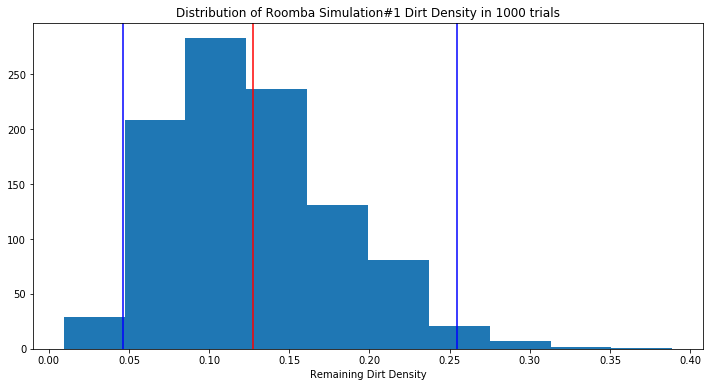

In [0]:
#histogram of the first strategy
from scipy.stats import sem, t
from scipy import mean

results1 = []
for j in range(1000):
    sim = Roomba_sim()
    sim.initialize()
    for i in range(300):
        sim.step()
    #sim.draw()
    sim.check_dirt()
    results1.append(sim.check_dirt())
m1 = np.mean(results1)
low_ci1 = np.percentile(results1, 2.5)
high_ci1 = np.percentile(results1, 97.5)
print(low_ci1,m1,high_ci1)

plt.figure(figsize=(12,6))
plt.hist(results1)
plt.axvline(m1,color='red')
plt.axvline(low_ci1,color='blue')
plt.axvline(high_ci1,color='blue')
plt.title('Distribution of Roomba Simulation#1 Dirt Density in 1000 trials')
plt.xlabel('Remaining Dirt Density')


###Histogram of Second Strategy

0.018518518518518517
0.0735648148148148
0.16666666666666666


Text(0.5, 0, 'Remaining Dirt Density')

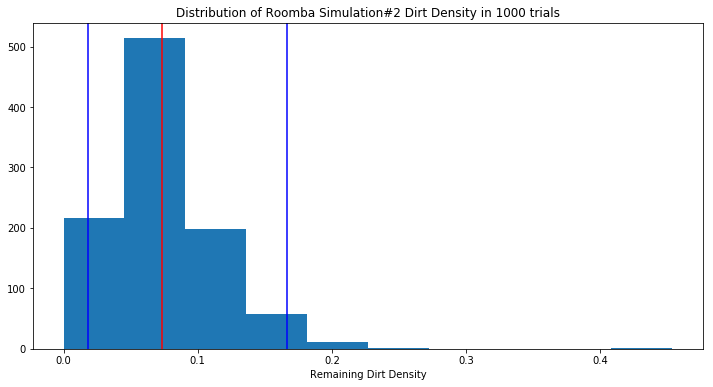

In [0]:
#histogram of the second strategy
from scipy.stats import sem, t
from scipy import mean

results2 = []
for j in range(1000):
    sim = Roomba_sim2()
    sim.initialize()
    for i in range(300):
        sim.step()
    sim.check_dirt()
    results2.append(sim.check_dirt())
m2 = np.mean(results2)
low_ci2 = np.percentile(results2, 2.5)
high_ci2 = np.percentile(results2, 97.5)
print(low_ci2)
print(m2)
print(high_ci2)

plt.figure(figsize=(12,6))
plt.hist(results2)
plt.axvline(m2,color='red')
plt.axvline(low_ci2,color='blue')
plt.axvline(high_ci2,color='blue')
plt.title('Distribution of Roomba Simulation#2 Dirt Density in 1000 trials')
plt.xlabel('Remaining Dirt Density')


###Comparison of Two Strategies 

0.12725925925925927
0.0735648148148148


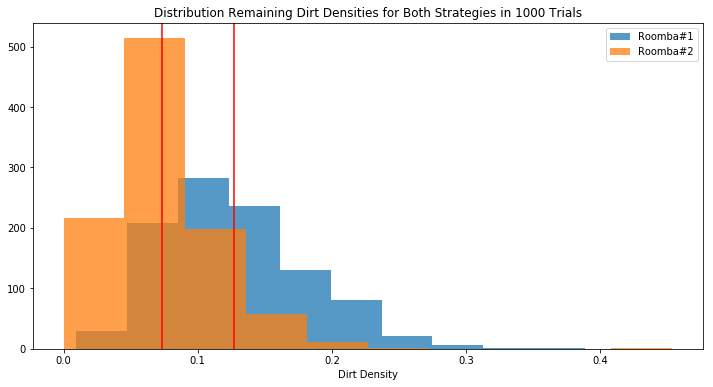

In [0]:
#comparison of the two strategies

from scipy.stats import sem, t
from scipy import mean

plt.figure(figsize=(12,6))
plt.hist(results1,label='Roomba#1',alpha = 0.75)
plt.hist(results2,label="Roomba#2",alpha = 0.75)
plt.axvline(np.mean(results1),color='red')
print(np.mean(results1))
plt.axvline(np.mean(results2),color='red')
print(np.mean(results2))
plt.title('Distribution Remaining Dirt Densities for Both Strategies in 1000 Trials')
plt.xlabel('Dirt Density')
plt.legend()
plt.show()


In [0]:
print('The Inefficient Roomba has: ' , str(round(np.mean(results1),2)), 'average dirt density remaining after 300 steps')
print('The Efficient Roomba has: ' , str(round(np.mean(results2),2)), 'average dirt density remaining after 300 steps')

###T-Test Results

In [0]:
from scipy.stats import ttest_ind
results = ttest_ind(results2,results1)
tstat = results[0]
pvalue = results[1]

print('The T-Test between the distributions is ' , str(tstat))
print('The P-Value of the T-Test is ', str(pvalue))
print('Hence, The second roomba is statistically more efficient than the first roomba')

The T-Test between the distributions is  -25.43055697141969
The P-Value of the T-Test is  7.860183452886821e-124
Hence, The second roomba is statistically more efficient than the first roomba


###Initial Dirt Distribution

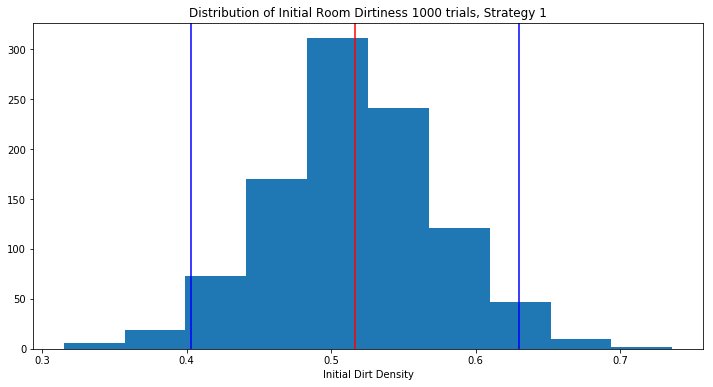

0.40266203703703707 0.5164953703703704 0.6297453703703703


In [0]:
initial_dirt = []

for i in range(1000):
    sim = Roomba_sim()
    sim.initialize()
    sim.check_dirt()
    initial_dirt.append(sim.check_dirt())

m3 = np.mean(initial_dirt)
low_ci3 = np.percentile(initial_dirt, 2.5)
high_ci3 = np.percentile(initial_dirt, 97.5)
plt.figure(figsize=(12,6))
plt.hist(initial_dirt)

plt.axvline(m3,color='red')
plt.axvline(low_ci3,color='blue')
plt.axvline(high_ci3,color='blue')
plt.title('Distribution of Initial Room Dirtiness 1000 trials, Strategy 1')
plt.xlabel('Initial Dirt Density')
plt.show()
print(low_ci3, m3, high_ci3)


###**Scenario 2**

###Strategy 1

In [0]:
#the first Roomba strategy 
class Roomba_sim():
    def __init__(self, size = 10):
        
        '''
     Inputs:
        
            size (int) The number of cells along each dimension of the
              2-dimensional grid. Default: 10.
        '''
        self.size= size
        self.steps = 0 
        #create an array of zeros
        self.current_state = np.zeros((self.size, self.size))      
        for i in range(self.size):
            for j in range(self.size):
                probability = random.random()
                
                if probability <0.1:
                    #randomly sets 10% of the room to be objects
                    self.current_state[i][j] = 5
                    
                
                #elif probability < 0.2:
                    #randomly sets 10% of the room to be clean
                    #self.current_state[i][j] = 0
                    
                else:
                #the other 80% are randomly set at a value from 1-4
                    self.current_state[i][j] = 4
        
    def initialize(self):
        #creates a wall around the perimeter, setting the value to 5 
        #so the roomba will not go through it 
        
        
        for x in [0,9]:
            for y in range(10):
                self.current_state[x,y] = 5
        
        for y in [0,9]:
            for x in range(10):
                self.current_state[x,y] = 5
               
        while True:
            #places the roomba randomly in the room 
            self.roomba_pos = (random.choice(range(1,self.size-1)),random.choice(range(1,self.size-1)))
            if self.current_state[self.roomba_pos] < 5:
                break 
        #the roomba cleans (subtracts one from the value of the cell) if it is identified to be dirty        
        if self.current_state[self.roomba_pos[0],self.roomba_pos[1]]>0: 
            self.current_state[self.roomba_pos[0],self.roomba_pos[1]] -=1 
        #movement is set to go one to the left 
        self.movement = np.array([-1,0])


    def check_hood(self):
        #function which changes neighborhood for possible places to go
        pos = self.roomba_pos 
        places = []
        #list of all the places that the roomba can go 
        
        for direction in [[0,1],[1,0],[0,-1],[-1,0]]:
            next_place = np.array(pos) + np.array(direction)
            
            if self.current_state[next_place[0],next_place[1]] < 5:
                places.append(next_place)
            #places all cells under 5 as possible places to go
        
        self.roomba_pos = random.choice(places)  
        #roomba randomly chooses one of the places to move & clean


    def step(self):
    
        self.check_hood()
        #first calls the check hood function to move to a non-object in neighborhood 

        if self.current_state[self.roomba_pos[0], self.roomba_pos[1]] > 0:
            self.current_state[self.roomba_pos[0], self.roomba_pos[1]] -= 1
        self.steps += 1
         #the state of the cell decreases by 1 as the roomba "cleans it"

    def check_dirt(self):
        
        dirty_cells = []
        #creates an empty array to store dirty cells
        for i in range(self.size):
            for j in range(self.size):
                if self.current_state[i][j] > 0 and self.current_state[i][j]<5:
                    dirty_cells.append(self.current_state[i][j])
        #loops through the array, storing all the dirty cells into the array 
        
        if len(dirty_cells) != 0:
            #if the array of dirty cells is not equal to zero
            room_size = self.size * self.size
            walls = (2*self.size)+(2*(self.size-2))
            objects = (room_size-walls)*0.1
            #this equation finds the number of cells that could contain dirt 
            #and multiplies then by 4, the max amount of dirt to find the dirt potential
            dirt_potential = (room_size - walls - objects)*4
            #print(dirt_potential)
            average_dirt = sum(dirty_cells)/dirt_potential 
            #print(sum(dirty_cells))
        else:
            average_dirt = 0            
        return(average_dirt)
   
    def draw(self):
        '''
        Draw  current state of the cellular automaton.
        '''
        
        plt.imshow(self.current_state,  cmap='YlOrBr')
        plt.title('Roomba Position: ' + str(self.roomba_pos))
        plt.show()

###Strategy 2

In [0]:
class Roomba_sim2():
    # Create the attributes of the room class
    def __init__(self, size = 10):
        
        '''
     Inputs:
        
            size (int) The number of cells along each dimension of the
              2-dimensional grid. Default: 100.

        '''
        self.size=size
        self.steps = 0 
        
        self.current_state = np.zeros((self.size, self.size))      
        for i in range(self.size):
            for j in range(self.size):
                probability = random.random()
                
                if probability <0.1:
                     #randomly sets 10% of the room to be objects
                    self.current_state[i][j] = 5  
                #elif probability < 0.2:
                     #randomly sets 10% of the room to be clean
                    #self.current_state[i][j] = 0        
                else:
                    self.current_state[i][j] = 4
                    #the others are randomly set at a value from 1-4
        self.size = size
        
    def initialize(self):
        
        for x in [0,9]:
            for y in range(10):
                self.current_state[x,y] = 5
        
        for y in [0,9]:
            for x in range(10):
                self.current_state[x,y] = 5
        #creates a border/wall, setting all those cells to 5
        
        while True:
            self.roomba_pos = (random.choice(range(1,self.size-1)),random.choice(range(1,self.size-1)))
            if self.current_state[self.roomba_pos] < 5:
                break
        #randomly places roomba 
                
        if self.current_state[self.roomba_pos[0],self.roomba_pos[1]]>0: 
            self.current_state[self.roomba_pos[0],self.roomba_pos[1]] -= 1
        self.movement = np.array([-1,0])

    def check_hood(self):
        pos = self.roomba_pos 
        places = []
        #create an array of all the places the roomba can go
        priority_place = []
        #creates an array of places deemed 'priority'
        
        #chooses a direction in the immediate neighborhood
        for direction in [[0,1],[1,0],[0,-1],[-1,0]]:
            #determines a possible next place
            next_place = np.array(pos) + np.array(direction)
            
            if self.current_state[next_place[0],next_place[1]] < 5:
                #tests if this next place is less than 5, if so, appends
                if self.current_state[next_place[0],next_place[1]] == 4 or \
                    self.current_state[next_place[0],next_place[1]]==3:
                    priority_place.append(next_place)
                    #appends cells of value 3 & 4 into the priority array
                else:
                    places.append(next_place)
                    #appends other cells in the possible places array
                
        if priority_place != []:
            self.roomba_pos = random.choice(priority_place)
        else: 
            self.roomba_pos = random.choice(places)

    def step(self):
    
        self.check_hood()

        #the state of the cell decreases by 1 
        if self.current_state[self.roomba_pos[0], self.roomba_pos[1]] > 0:
            self.current_state[self.roomba_pos[0], self.roomba_pos[1]] -=1
        self.steps += 1
    
    def check_dirt(self):
        
        dirty_cells = []
        #creates an empty array to store dirty cells
        for i in range(self.size):
            for j in range(self.size):
                if self.current_state[i][j] > 0 and self.current_state[i][j]<5:
                    dirty_cells.append(self.current_state[i][j])
        #loops through the array, storing all the dirty cells into the array 
        
        if len(dirty_cells) != 0:
            #if the array of dirty cells is not equal to zero
            room_size = self.size * self.size
            walls = (2*self.size)+(2*(self.size-2))
            objects = room_size*0.1
            #this equation finds the number of cells that could contain dirt 
            #and multiplies then by 4, the max amount of dirt to find the dirt potential
            dirt_potential = (room_size - walls - objects)*4
            average_dirt = sum(dirty_cells)/dirt_potential 
        else:
            average_dirt = 0            
        return(average_dirt)
   
    def draw(self):
        '''
        Draw  current state of the cellular automaton.
        '''
        
        plt.imshow(self.current_state,  cmap='YlOrBr')
        plt.title('Roomba Position: ' + str(self.roomba_pos))
        plt.show()



###Histogram of Strategy 1

0.16493055555555555 0.2928689236111111 0.4774305555555555


Text(0.5, 0, 'Dirt Density')

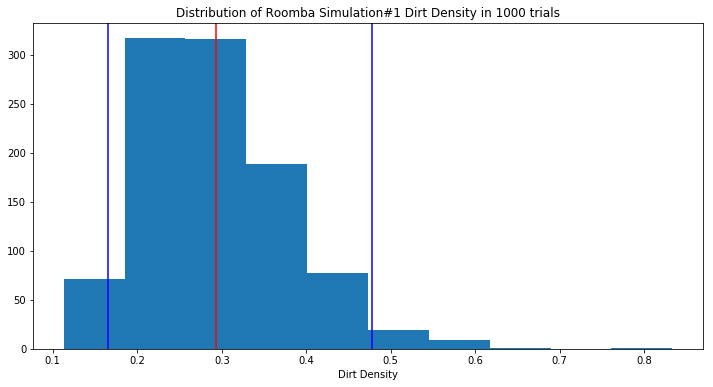

In [0]:
from scipy.stats import sem, t
from scipy import mean

results1 = []
for j in range(1000):
    sim = Roomba_sim()
    sim.initialize()
    for i in range(300):
        sim.step()
    #sim.draw()
    sim.check_dirt()
    results1.append(sim.check_dirt())
m1 = np.mean(results1)
low_ci1 = np.percentile(results1, 2.5)
high_ci1 = np.percentile(results1, 97.5)
print(low_ci1,m1,high_ci1)

plt.figure(figsize=(12,6))
plt.hist(results1)
plt.axvline(m1,color='red')
plt.axvline(low_ci1,color='blue')
plt.axvline(high_ci1,color='blue')
plt.title('Distribution of Roomba Simulation#1 Dirt Density in 1000 trials')
plt.xlabel('Dirt Density')


###Histogram of Strategy 2

0.0787037037037037
0.16692129629629632
0.2916666666666667


Text(0.5, 0, 'Dirt Density')

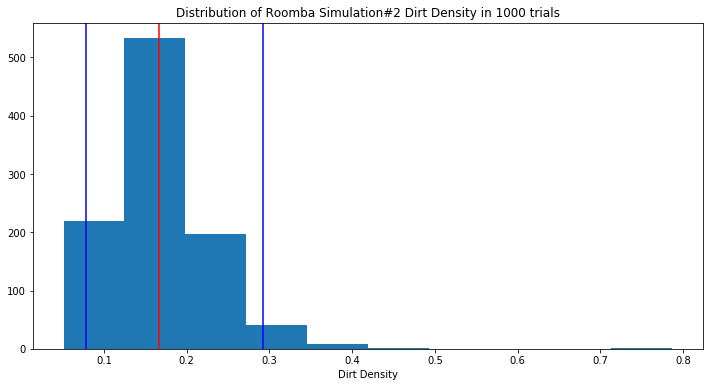

In [0]:
from scipy.stats import sem, t
from scipy import mean

results2 = []
for j in range(1000):
    sim = Roomba_sim2()
    sim.initialize()
    for i in range(300):
        sim.step()
    sim.check_dirt()
    results2.append(sim.check_dirt())
m2 = np.mean(results2)
low_ci2 = np.percentile(results2, 2.5)
high_ci2 = np.percentile(results2, 97.5)
print(low_ci2)
print(m2)
print(high_ci2)

plt.figure(figsize=(12,6))
plt.hist(results2)
plt.axvline(m2,color='red')
plt.axvline(low_ci2,color='blue')
plt.axvline(high_ci2,color='blue')
plt.title('Distribution of Roomba Simulation#2 Dirt Density in 1000 trials')
plt.xlabel('Dirt Density')


###Comparison

0.2928689236111111
0.16692129629629632


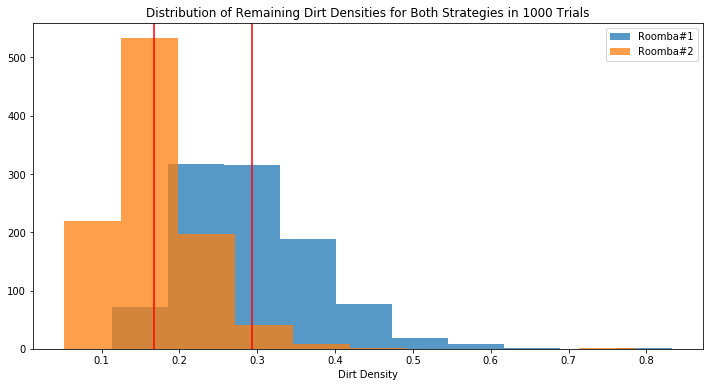

In [0]:
from scipy.stats import sem, t
from scipy import mean

plt.figure(figsize=(12,6))
plt.hist(results1,label='Roomba#1',alpha = 0.75)
plt.hist(results2,label="Roomba#2",alpha = 0.75)
plt.axvline(np.mean(results1),color='red')
print(np.mean(results1))
plt.axvline(np.mean(results2),color='red')
print(np.mean(results2))
plt.title('Distribution of Remaining Dirt Densities for Both Strategies in 1000 Trials')
plt.xlabel('Dirt Density')
plt.legend()
plt.show()

### T Test 

In [0]:
from scipy.stats import ttest_ind
results = ttest_ind(results2,results1)
tstat = results[0]
pvalue = results[1]

print('The T-Test between the distributions is ' , str(tstat))
print('The P-Value of the T-Test is ', str(pvalue))
print('Hence, The second roomba is statistically more efficient than the first roomba')

The T-Test between the distributions is  -38.42699661599456
The P-Value of the T-Test is  2.3111951519903963e-242
Hence, The second roomba is statistically more efficient than the first roomba
